# Demonstration of `pdfplumber`'s `extraction method`.

This notebook uses `pdfplumber` to extract data from an [PMBOK](./PMBOK.pdf).

### Import `pdfplumber`

In [1]:
import pdfplumber
print(pdfplumber.__version__)

0.6.0


### Load the PDF

In [2]:
pdf = pdfplumber.open("PMBOK.pdf")

### Get a page that contain curves , table ( p 145)

In [236]:
p145 = pdf.pages[145]

### Display the page

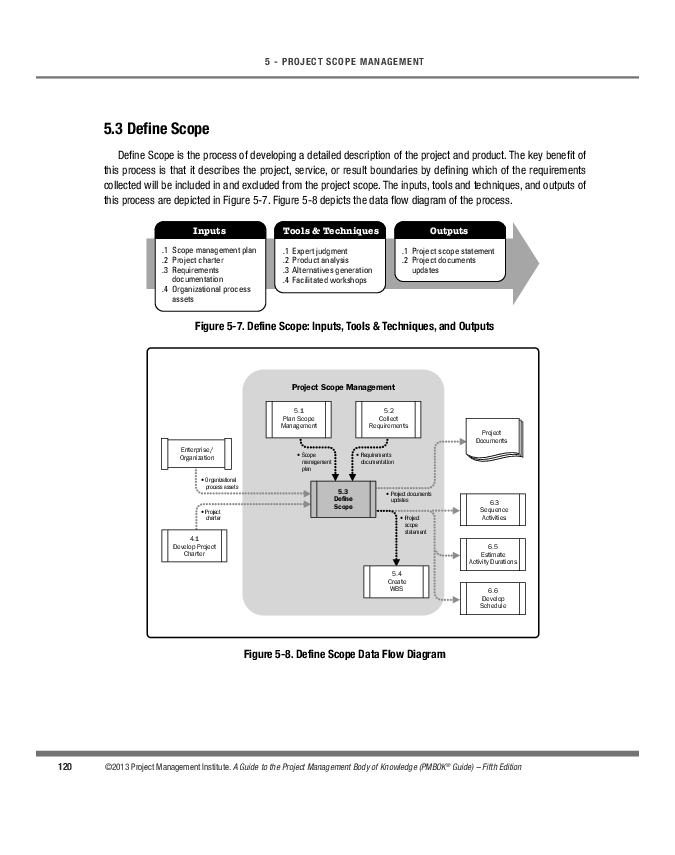

In [237]:
im = p145.to_image()# convert it to an image for display
im.reset()

### Use `.extract_table` to get the data from the largest table on the page

In [238]:
table = p145.extract_table()

`.extract_table` returns a list of lists, with each inner list representing a row in the table. 

In [239]:
table

[['', '5.1\nPlan Scope\nManagement', '']]

That was not a good result cause of the complex geometry of the page

Let's try to extract the text

In [282]:
text=p145.extract_text()
print(text)

5 - PROJECT SCOPE MANAGEMENT
5.3 define Scope
Define Scope is the process of developing a detailed description of the project and product. The key benefit of 
this process is that it describes the project, service, or result boundaries by defining which of the requirements 
collected will be included in and excluded from the project scope. The inputs, tools and techniques, and outputs of 
this process are depicted in Figure 5-7. Figure 5-8 depicts the data flow diagram of the process.
Inputs Tools & Techniques Outputs
.1 Scope management plan .1 Expert judgment .1 Project scope statement
.2 Project charter .2 Product analysis .2 Project documents  
.3 Requirements     .3 Alternatives generation   updates
  documentation .4 Facilitated workshops
.4 Organizational process  
  assets
Figure 5-7. define Scope: Inputs, tools & techniques, and outputs
Project Scope Management
5.1 5.2
Plan Scope Collect
Management Requirements
Project
Documents
Enterprise/
Organization • Scope • Requirements


### Extract every single character

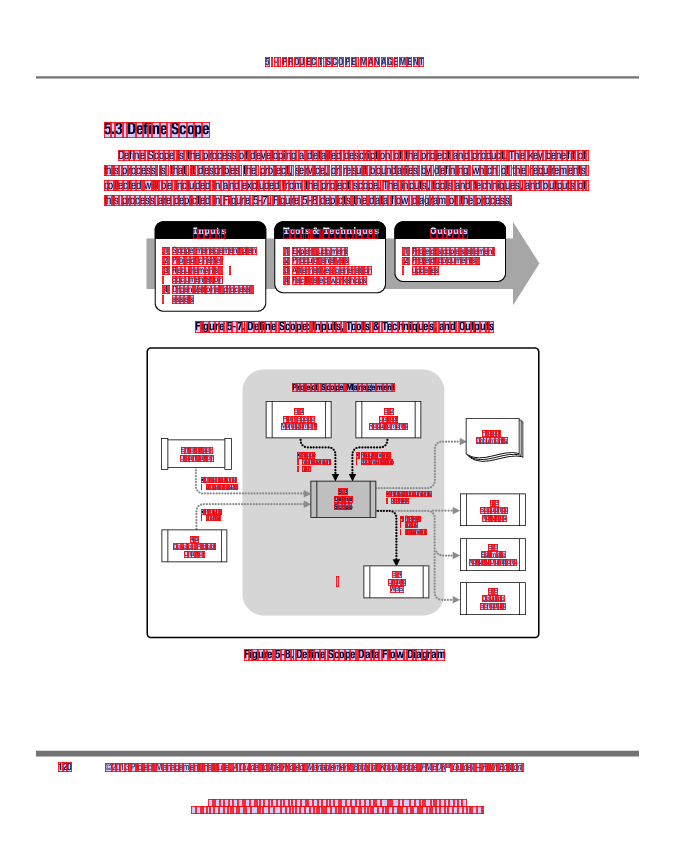

In [283]:
im.reset().draw_rects(p145.chars)

---

---

---

### Locate all tabular in the page
The result are not always precise, so we have to deal with complex form of table

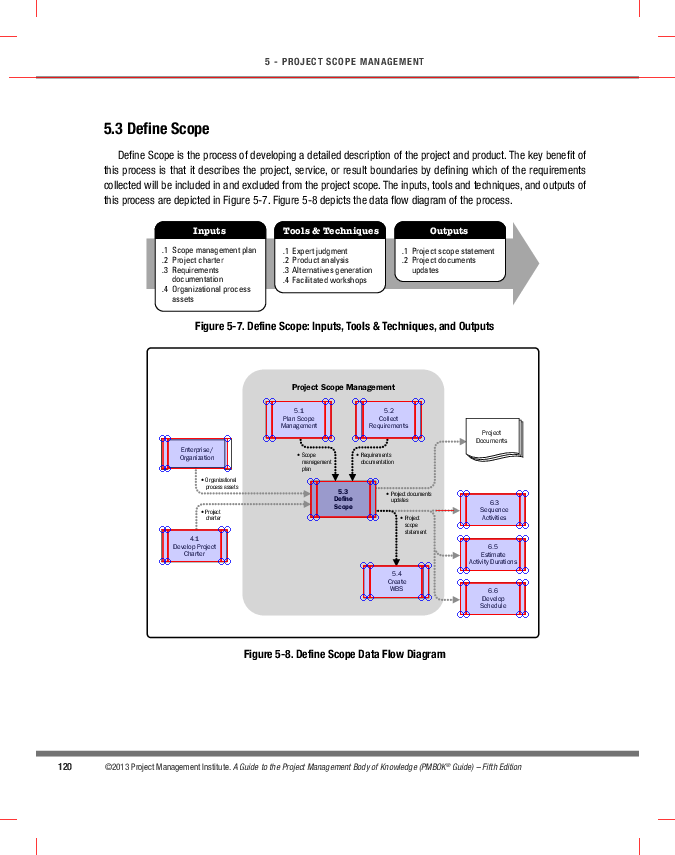

In [241]:
im.reset().debug_tablefinder()

### Extracting Curves

Extracting curves from the page is given by the method `.curves`

In [245]:
p145.curves[0]

{'x0': -10.413000000000011,
 'y0': 98.5265,
 'x1': 1273.5,
 'y1': 104.1765,
 'width': 1283.913,
 'height': 5.650000000000006,
 'pts': [(1272.5, 104.1765),
  (1273.5, 103.1765),
  (1273.5, 99.5265),
  (1272.5, 98.5265),
  (-9.413000000000011, 98.5265),
  (-10.413000000000011, 99.5265),
  (-10.413000000000011, 103.1765),
  (-9.413000000000011, 104.1765),
  (1272.5, 104.1765)],
 'linewidth': 1,
 'stroke': False,
 'fill': True,
 'evenodd': False,
 'stroking_color': 0,
 'non_stroking_color': 0.45017,
 'object_type': 'curve',
 'page_number': 146,
 'points': [(1272.5, 750.8235),
  (1273.5, 751.8235),
  (1273.5, 755.4735000000001),
  (1272.5, 756.4735000000001),
  (-9.413000000000011, 756.4735000000001),
  (-10.413000000000011, 755.4735000000001),
  (-10.413000000000011, 751.8235),
  (-9.413000000000011, 750.8235),
  (1272.5, 750.8235)],
 'top': 750.8235,
 'bottom': 756.4735000000001,
 'doctop': 124725.8235}

In [284]:
len(p145.curves)

40

We have `40` curves in the pages 145

Let's have a look to the 7'th curve in the list 

In [285]:
p145.curves[6]

{'x0': 274.8501,
 'y0': 562.3433,
 'x1': 385.4341,
 'y1': 633.1433000000001,
 'width': 110.584,
 'height': 70.80000000000007,
 'pts': [(385.4341, 570.5243),
  (377.2531, 562.3433),
  (283.0301, 562.3433),
  (274.8501, 570.5243),
  (274.8501, 624.9623),
  (283.0301, 633.1433000000001),
  (377.2531, 633.1433000000001),
  (385.4341, 624.9623),
  (385.4341, 570.5243)],
 'linewidth': 1,
 'stroke': False,
 'fill': True,
 'evenodd': False,
 'stroking_color': 0,
 'non_stroking_color': 1,
 'object_type': 'curve',
 'page_number': 146,
 'points': [(385.4341, 284.47569999999996),
  (377.2531, 292.6567),
  (283.0301, 292.6567),
  (274.8501, 284.47569999999996),
  (274.8501, 230.03769999999997),
  (283.0301, 221.85669999999993),
  (377.2531, 221.85669999999993),
  (385.4341, 230.03769999999997),
  (385.4341, 284.47569999999996)],
 'top': 221.85669999999993,
 'bottom': 292.6567,
 'doctop': 124196.8567}

### Looking inside a closed curve ( box)
We will use the `.crop` method as explained below to extract a region from the page


| Method | Description |
|--------|-------------|
|`.crop(bounding_box, relative=False)`| Returns a version of the page cropped to the bounding box, which should be expressed as 4-tuple with the values `(x0, top, x1, bottom)`. Cropped pages retain objects that fall at least partly within the bounding box. If an object falls only partly within the box, its dimensions are sliced to fit the bounding box. If `relative=True`, the bounding box is calculated as an offset from the top-left of the page's bounding box, rather than an absolute positioning. (See [Issue #245](https://github.com/jsvine/pdfplumber/issues/245) for a visual example and explanation.)|

Let's get the coordinate of the `box` that contain the 7'th curve

In [286]:
u,v,x,y=p145.curves[6]['x0'],p145.curves[6]['top'],p145.curves[6]['x1'],p145.curves[6]['bottom']

We crop the region of the page 145 that is delimetd by the `box`

In [287]:
p1=p145.crop((u,v,x,y))

Let's see the result

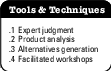

In [251]:
im1 = p1.to_image()
im1

We could extract the text in the cropped region

In [222]:
text_crop=p1.extract_text()
print(text_crop)

Tools & Techniques
.1 Expert judgment
.2 Product analysis
.3 Alternatives generation
.4 Facilitated workshops


Let's show the text extracted in the region delimited by the box from the original page 

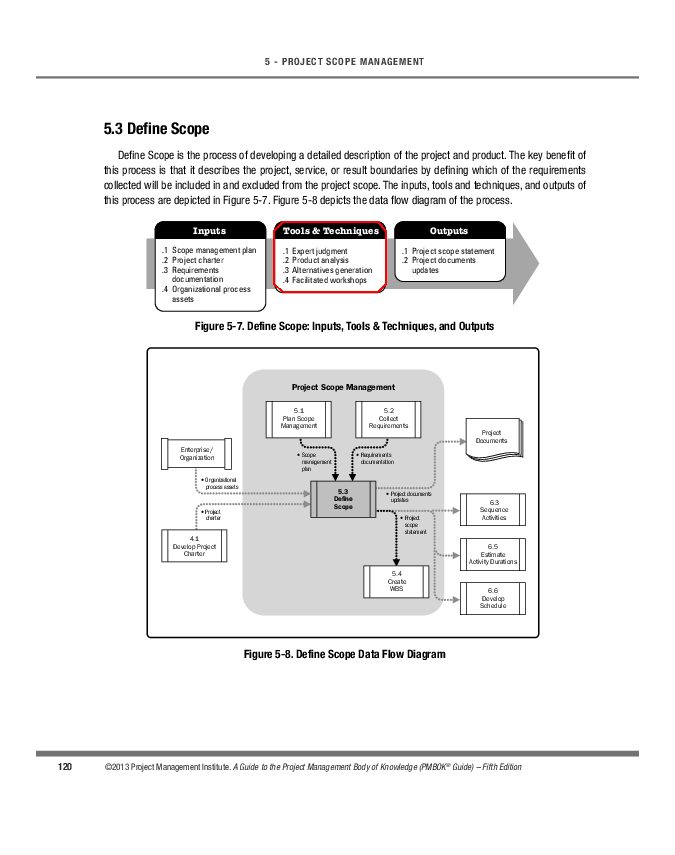

In [288]:
im.reset()
im.draw_lines([p145.curves[6]], stroke="red", stroke_width=2)

### Show all the curves in the page

In [270]:
color={0 : 'blue',1 : 'green',2 : 'red',3 : 'cyan',4 : 'magenta',5 : 'yellow'}

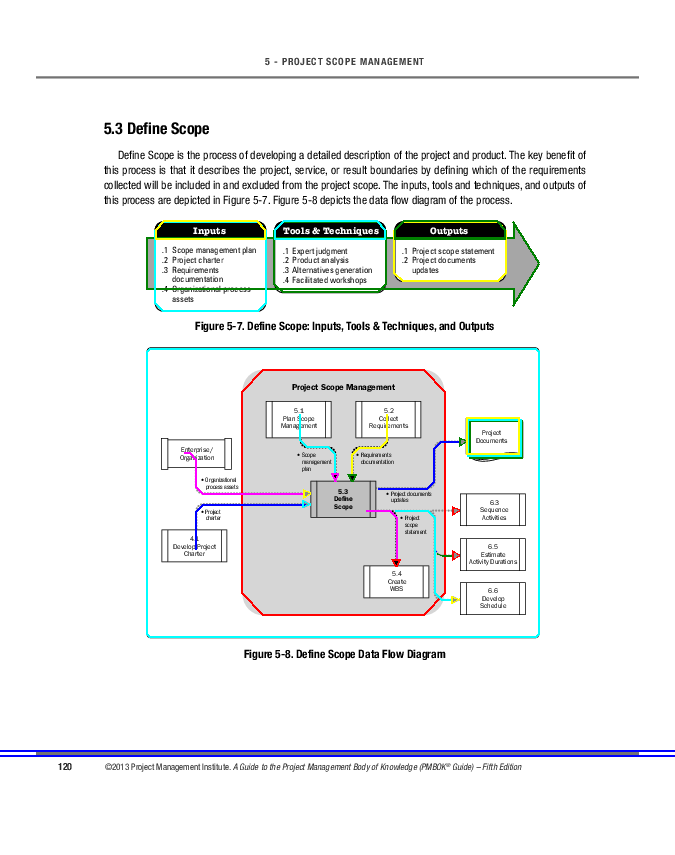

In [289]:
im.reset()
for _,u in enumerate(p145.curves):
    im.draw_lines([u], stroke=color[_%6], stroke_width=2)
im

### Draw all the rectangles detected in the page

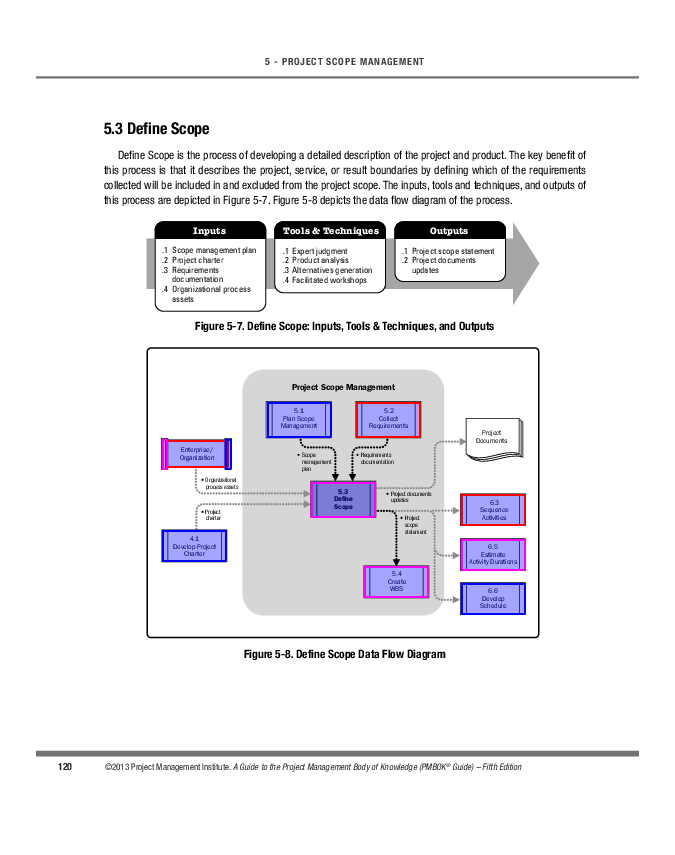

In [290]:
im.reset()
for _,u in enumerate(p145.rects):
    im.draw_rects([u], stroke=color[(_+3)%6], stroke_width=2)
im
